# Data Prepartion and EDA

This notebook initiates our systematic journey through Exploratory Data Analysis (EDA), the pivotal stage where we acquaint ourselves with the fundamental characteristics of our dataset. Through this exploration, we aim to discern patterns and irregularities, and establish a foundational understanding that informs our subsequent strategies. Our approach simplifies the inherent complexity of the data, ensuring accessibility and comprehensibility, paramount for informed decision-making as our project progresses.

In [48]:
#import libraries
import pandas as pd

In [49]:
#read extracted csv file
df = pd.read_csv('/projectnb/ds549/students/vedikas/ml-terc-image-geolocation/data/exif_metadata.csv')
df.head(15)

,ImageFilename,GPSVersionID,GPSLatitudeRef,GPSLatitude,GPSLongitudeRef,GPSLongitude,GPSAltitude,GPSSpeed,ResolutionUnit,ExifOffset,...,YCbCrCoefficients,YCbCrPositioning,SamplesPerPixel,XPComment,XPAuthor,Rating,RatingPercent,ComponentsConfiguration,CompressedBitsPerPixel,FlashPixVersion
0,iss036e049939.jpg,,S,"(2.0, 34.3662, 0.0)",E,"(36.0, 25.5031, 0.0)",412491.111111,27598.746269,2,340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,iss038e064247.jpg,,N,"(42.0, 10.5534, 0.0)",E,"(14.0, 55.1032, 0.0)",417359.416667,27597.964912,2,438,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,iss040e065496.jpg,,S,"(22.0, 22.0608, 0.0)",E,"(26.0, 17.4832, 0.0)",420041.277778,27578.846154,2,620,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,iss040e075028.jpg,,N,"(32.0, 8.8572, 0.0)",W,"(110.0, 6.7725, 0.0)",421514.875000,27579.205882,2,266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,iss040e092721.jpg,,N,"(38.0, 42.6228, 0.0)",E,"(15.0, 20.829, 0.0)",414689.111111,27608.750929,2,256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,iss040e125148.jpg,,N,"(51.0, 36.738, 0.0)",E,"(3.0, 38.935, 0.0)",419584.222222,27602.119048,2,232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,iss041e011621.jpg,,N,"(34.0, 52.0, 43.18)",W,"(4.0, 35.0, 34.99)",416115.500000,27600.882353,2,242,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,iss041e109444.jpg,,N,"(38.0, 23.256, 0.0)",E,"(10.0, 56.9212, 0.0)",415585.583333,27603.611111,2,230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,iss042e062108.jpg,,N,"(39.0, 44.3124, 0.0)",E,"(35.0, 55.6963, 0.0)",414256.642857,27599.735849,2,230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,iss050e070478.jpg,,N,"(42.0, 10.3992, 0.0)",W,"(74.0, 36.3344, 0.0)",404564.545455,27632.840426,2,230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
#checking null-values
pd.set_option('display.max_rows', None) #tell pandas to not limit the number of rows being printed
print(df.isnull().sum())

ImageFilename                  0
GPSVersionID                   0
GPSLatitudeRef                 0
GPSLatitude                    0
GPSLongitudeRef                0
GPSLongitude                   0
GPSAltitude                    0
GPSSpeed                       0
ResolutionUnit                 0
ExifOffset                     0
ImageDescription              84
Make                           0
Model                          0
Software                       0
DateTime                       0
Copyright                    138
XResolution                    0
YResolution                    0
ExifVersion                    0
ShutterSpeedValue              0
ApertureValue                  0
DateTimeOriginal               0
DateTimeDigitized              0
ExposureBiasValue              0
MaxApertureValue               0
MeteringMode                   0
LightSource                    0
Flash                          0
FocalLength                    0
ColorSpace                     0
WhiteBalan

In [51]:
#check-dimensions
df.shape

(142, 86)

**In our dataset, columns with excessive missing values can introduce noise and potential bias, impacting the reliability of our exploratory analysis and subsequent modeling. We've established a threshold, opting to drop any column with more than 20 null entries. This approach streamlines our dataset, maintaining a balance between maximal data retention and minimal noise interference, thereby ensuring a more robust foundation for our downstream analyses.**

In [52]:
#drop columns with more than 20 null values
df.dropna(thresh=len(df)-20, inplace=True, axis=1)
print(df.isnull().sum())
print(df.shape)

ImageFilename               0
GPSVersionID                0
GPSLatitudeRef              0
GPSLatitude                 0
GPSLongitudeRef             0
GPSLongitude                0
GPSAltitude                 0
GPSSpeed                    0
ResolutionUnit              0
ExifOffset                  0
Make                        0
Model                       0
Software                    0
DateTime                    0
XResolution                 0
YResolution                 0
ExifVersion                 0
ShutterSpeedValue           0
ApertureValue               0
DateTimeOriginal            0
DateTimeDigitized           0
ExposureBiasValue           0
MaxApertureValue            0
MeteringMode                0
LightSource                 0
Flash                       0
FocalLength                 0
ColorSpace                  0
WhiteBalance                0
FocalLengthIn35mmFilm       0
SceneCaptureType            0
SubsecTimeOriginal          0
Saturation                  0
Sharpness 

In [53]:
df["DateTime"]

0      2020:03:31 09:23:47
1      2020:05:06 11:49:33
2      2021:02:24 13:48:51
3      2022:07:28 12:53:09
4      2017:10:16 12:48:31
5      2017:10:16 12:48:31
6      2017:10:16 12:48:31
7      2017:10:16 12:48:32
8      2017:10:16 12:48:32
9      2017:10:16 09:38:48
10     2017:10:16 09:38:48
11     2017:10:16 09:38:52
12     2017:10:16 09:38:53
13     2017:10:16 09:38:53
14     2017:10:16 09:38:54
15     2017:10:16 09:38:54
16     2017:10:12 10:37:54
17     2017:10:12 10:37:55
18     2017:10:12 10:37:55
19     2017:10:12 10:37:58
20     2017:10:12 10:38:00
21     2017:10:12 10:38:03
22     2017:10:12 10:38:03
23     2017:10:12 10:38:04
24     2017:10:12 10:38:05
25     2017:10:12 10:38:08
26     2017:10:12 10:38:08
27     2017:10:12 10:38:09
28     2017:10:12 10:38:10
29     2017:11:02 16:28:29
30     2023:01:23 16:25:21
31     2018:05:10 11:27:10
32     2021:02:24 14:43:05
33     2018:05:22 14:25:21
34     2022:05:17 15:24:57
35     2022:05:16 17:14:36
36     2018:06:06 14:10:28
3

In [54]:
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y:%m:%d %H:%M:%S')

# Extract date and time into their own columns
df['Date'] = df['DateTime'].dt.date
df['Time'] = df['DateTime'].dt.time

# Drop the DateTime column
df.drop('DateTime', axis=1, inplace=True)

df[['Date', 'Time']].head()

,Date,Time
0,2020-03-31,09:23:47
1,2020-05-06,11:49:33
2,2021-02-24,13:48:51
3,2022-07-28,12:53:09
4,2017-10-16,12:48:31


**We've separated the 'DateTime' column into distinct 'Date' and 'Time' columns, enhancing the granularity of our dataset. This deliberate segregation aids in more nuanced analysis, allowing for precise querying and potential time series analysis or chronological filtering that could reveal hidden trends or patterns tied to specific timeframes.**

In [55]:
#check the remaining columns
df.columns

Index(['ImageFilename', 'GPSVersionID', 'GPSLatitudeRef', 'GPSLatitude',
       'GPSLongitudeRef', 'GPSLongitude', 'GPSAltitude', 'GPSSpeed',
       'ResolutionUnit', 'ExifOffset', 'Make', 'Model', 'Software',
       'XResolution', 'YResolution', 'ExifVersion', 'ShutterSpeedValue',
       'ApertureValue', 'DateTimeOriginal', 'DateTimeDigitized',
       'ExposureBiasValue', 'MaxApertureValue', 'MeteringMode', 'LightSource',
       'Flash', 'FocalLength', 'ColorSpace', 'WhiteBalance',
       'FocalLengthIn35mmFilm', 'SceneCaptureType', 'SubsecTimeOriginal',
       'Saturation', 'Sharpness', 'SubjectDistanceRange', 'SensingMethod',
       'FileSource', 'ExposureTime', 'FNumber', 'SceneType', 'ExposureProgram',
       'CustomRendered', 'ISOSpeedRatings', 'ExposureMode', 'BodySerialNumber',
       'LensSpecification', 'LensModel', 'GainControl', 'Contrast',
       'CFAPattern', 'UserComment', 'FocalPlaneXResolution',
       'FocalPlaneYResolution', 'FocalPlaneResolutionUnit', 'SensitivityTy

In [56]:
#check the datafram again to see what more needs to be cleaned
df.head(5)

,ImageFilename,GPSVersionID,GPSLatitudeRef,GPSLatitude,GPSLongitudeRef,GPSLongitude,GPSAltitude,GPSSpeed,ResolutionUnit,ExifOffset,...,GainControl,Contrast,CFAPattern,UserComment,FocalPlaneXResolution,FocalPlaneYResolution,FocalPlaneResolutionUnit,SensitivityType,Date,Time
0,iss036e049939.jpg,,S,"(2.0, 34.3662, 0.0)",E,"(36.0, 25.5031, 0.0)",412491.111111,27598.746269,2,340,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-31,09:23:47
1,iss038e064247.jpg,,N,"(42.0, 10.5534, 0.0)",E,"(14.0, 55.1032, 0.0)",417359.416667,27597.964912,2,438,...,0,0,,NaN,NaN,NaN,NaN,NaN,2020-05-06,11:49:33
2,iss040e065496.jpg,,S,"(22.0, 22.0608, 0.0)",E,"(26.0, 17.4832, 0.0)",420041.277778,27578.846154,2,620,...,0,0,,ASCII,NaN,NaN,NaN,NaN,2021-02-24,13:48:51
3,iss040e075028.jpg,,N,"(32.0, 8.8572, 0.0)",W,"(110.0, 6.7725, 0.0)",421514.875000,27579.205882,2,266,...,0,0,,ASCII,NaN,NaN,NaN,NaN,2022-07-28,12:53:09
4,iss040e092721.jpg,,N,"(38.0, 42.6228, 0.0)",E,"(15.0, 20.829, 0.0)",414689.111111,27608.750929,2,256,...,0,0,,ASCII,NaN,NaN,NaN,NaN,2017-10-16,12:48:31


In [57]:
#check the data types of the columns
df.dtypes

ImageFilename                object
GPSVersionID                 object
GPSLatitudeRef               object
GPSLatitude                  object
GPSLongitudeRef              object
GPSLongitude                 object
GPSAltitude                 float64
GPSSpeed                    float64
ResolutionUnit                int64
ExifOffset                    int64
Make                         object
Model                        object
Software                     object
XResolution                 float64
YResolution                 float64
ExifVersion                   int64
ShutterSpeedValue           float64
ApertureValue               float64
DateTimeOriginal             object
DateTimeDigitized            object
ExposureBiasValue           float64
MaxApertureValue            float64
MeteringMode                  int64
LightSource                   int64
Flash                         int64
FocalLength                 float64
ColorSpace                    int64
WhiteBalance                

In [59]:
df.select_dtypes(include=['object']).head()

,ImageFilename,GPSVersionID,GPSLatitudeRef,GPSLatitude,GPSLongitudeRef,GPSLongitude,Make,Model,Software,DateTimeOriginal,DateTimeDigitized,FileSource,SceneType,LensSpecification,LensModel,CFAPattern,UserComment,Date,Time
0,iss036e049939.jpg,,S,"(2.0, 34.3662, 0.0)",E,"(36.0, 25.5031, 0.0)",NIKON CORPORATION,NIKON D3X,Adobe Photoshop Lightroom Classic 9.2 (Macintosh),2013:06:12 12:47:50,2013:06:12 12:47:50,,,"(600.0, 600.0, 4.0, 4.0)",600.0 mm f/4.0,NaN,NaN,2020-03-31,09:23:47
1,iss038e064247.jpg,,N,"(42.0, 10.5534, 0.0)",E,"(14.0, 55.1032, 0.0)",NIKON CORPORATION,NIKON D3S,Adobe Photoshop Lightroom Classic 9.2 (Macintosh),2014:03:06 13:34:43,2014:03:06 13:34:43,,,"(400.0, 400.0, 2.8, 2.8)",400.0 mm f/2.8,,NaN,2020-05-06,11:49:33
2,iss040e065496.jpg,,S,"(22.0, 22.0608, 0.0)",E,"(26.0, 17.4832, 0.0)",NIKON CORPORATION,NIKON D3S,Adobe Photoshop Lightroom Classic 10.1.1 (Maci...,2014:07:15 13:13:03,2014:07:15 13:13:03,,,"(80.0, 200.0, 2.8, 2.8)",80.0-200.0 mm f/2.8,,ASCII,2021-02-24,13:48:51
3,iss040e075028.jpg,,N,"(32.0, 8.8572, 0.0)",W,"(110.0, 6.7725, 0.0)",NIKON CORPORATION,NIKON D3S,Adobe Photoshop Lightroom Classic 11.4.1 (Maci...,2014:07:23 15:51:51,2014:07:23 15:51:51,,,"(80.0, 200.0, 2.8, 2.8)",80.0-200.0 mm f/2.8,,ASCII,2022-07-28,12:53:09
4,iss040e092721.jpg,,N,"(38.0, 42.6228, 0.0)",E,"(15.0, 20.829, 0.0)",NIKON CORPORATION,NIKON D3S,Adobe Photoshop Lightroom 6.12 (Macintosh),2014:08:13 15:45:48,2014:08:13 15:45:48,,,"(80.0, 200.0, 2.8, 2.8)",80.0-200.0 mm f/2.8,,ASCII,2017-10-16,12:48:31


In [60]:
#drop columns with not useful information
df.drop(["GPSVersionID", "FileSource",	"SceneType", "CFAPattern"], inplace=True, axis=1)
df.select_dtypes(include=['object']).head()

,ImageFilename,GPSLatitudeRef,GPSLatitude,GPSLongitudeRef,GPSLongitude,Make,Model,Software,DateTimeOriginal,DateTimeDigitized,LensSpecification,LensModel,UserComment,Date,Time
0,iss036e049939.jpg,S,"(2.0, 34.3662, 0.0)",E,"(36.0, 25.5031, 0.0)",NIKON CORPORATION,NIKON D3X,Adobe Photoshop Lightroom Classic 9.2 (Macintosh),2013:06:12 12:47:50,2013:06:12 12:47:50,"(600.0, 600.0, 4.0, 4.0)",600.0 mm f/4.0,NaN,2020-03-31,09:23:47
1,iss038e064247.jpg,N,"(42.0, 10.5534, 0.0)",E,"(14.0, 55.1032, 0.0)",NIKON CORPORATION,NIKON D3S,Adobe Photoshop Lightroom Classic 9.2 (Macintosh),2014:03:06 13:34:43,2014:03:06 13:34:43,"(400.0, 400.0, 2.8, 2.8)",400.0 mm f/2.8,NaN,2020-05-06,11:49:33
2,iss040e065496.jpg,S,"(22.0, 22.0608, 0.0)",E,"(26.0, 17.4832, 0.0)",NIKON CORPORATION,NIKON D3S,Adobe Photoshop Lightroom Classic 10.1.1 (Maci...,2014:07:15 13:13:03,2014:07:15 13:13:03,"(80.0, 200.0, 2.8, 2.8)",80.0-200.0 mm f/2.8,ASCII,2021-02-24,13:48:51
3,iss040e075028.jpg,N,"(32.0, 8.8572, 0.0)",W,"(110.0, 6.7725, 0.0)",NIKON CORPORATION,NIKON D3S,Adobe Photoshop Lightroom Classic 11.4.1 (Maci...,2014:07:23 15:51:51,2014:07:23 15:51:51,"(80.0, 200.0, 2.8, 2.8)",80.0-200.0 mm f/2.8,ASCII,2022-07-28,12:53:09
4,iss040e092721.jpg,N,"(38.0, 42.6228, 0.0)",E,"(15.0, 20.829, 0.0)",NIKON CORPORATION,NIKON D3S,Adobe Photoshop Lightroom 6.12 (Macintosh),2014:08:13 15:45:48,2014:08:13 15:45:48,"(80.0, 200.0, 2.8, 2.8)",80.0-200.0 mm f/2.8,ASCII,2017-10-16,12:48:31


**Removed the columns 'GPSVersionID', 'FileSource', 'SceneType', and 'CFAPattern' from our dataset, as they contained non-informative or redundant data that doesn't contribute to our analysis objectives. This step helps streamline the dataset, focusing on meaningful content and reducing memory usage, thereby making subsequent data handling more efficient.**

In [61]:
#checking the data again
print(df.columns)
print(df.shape)
df.head(5)

Index(['ImageFilename', 'GPSLatitudeRef', 'GPSLatitude', 'GPSLongitudeRef',
       'GPSLongitude', 'GPSAltitude', 'GPSSpeed', 'ResolutionUnit',
       'ExifOffset', 'Make', 'Model', 'Software', 'XResolution', 'YResolution',
       'ExifVersion', 'ShutterSpeedValue', 'ApertureValue', 'DateTimeOriginal',
       'DateTimeDigitized', 'ExposureBiasValue', 'MaxApertureValue',
       'MeteringMode', 'LightSource', 'Flash', 'FocalLength', 'ColorSpace',
       'WhiteBalance', 'FocalLengthIn35mmFilm', 'SceneCaptureType',
       'SubsecTimeOriginal', 'Saturation', 'Sharpness', 'SubjectDistanceRange',
       'SensingMethod', 'ExposureTime', 'FNumber', 'ExposureProgram',
       'CustomRendered', 'ISOSpeedRatings', 'ExposureMode', 'BodySerialNumber',
       'LensSpecification', 'LensModel', 'GainControl', 'Contrast',
       'UserComment', 'FocalPlaneXResolution', 'FocalPlaneYResolution',
       'FocalPlaneResolutionUnit', 'SensitivityType', 'Date', 'Time'],
      dtype='object')
(142, 52)


,ImageFilename,GPSLatitudeRef,GPSLatitude,GPSLongitudeRef,GPSLongitude,GPSAltitude,GPSSpeed,ResolutionUnit,ExifOffset,Make,...,LensModel,GainControl,Contrast,UserComment,FocalPlaneXResolution,FocalPlaneYResolution,FocalPlaneResolutionUnit,SensitivityType,Date,Time
0,iss036e049939.jpg,S,"(2.0, 34.3662, 0.0)",E,"(36.0, 25.5031, 0.0)",412491.111111,27598.746269,2,340,NIKON CORPORATION,...,600.0 mm f/4.0,0,0,NaN,NaN,NaN,NaN,NaN,2020-03-31,09:23:47
1,iss038e064247.jpg,N,"(42.0, 10.5534, 0.0)",E,"(14.0, 55.1032, 0.0)",417359.416667,27597.964912,2,438,NIKON CORPORATION,...,400.0 mm f/2.8,0,0,NaN,NaN,NaN,NaN,NaN,2020-05-06,11:49:33
2,iss040e065496.jpg,S,"(22.0, 22.0608, 0.0)",E,"(26.0, 17.4832, 0.0)",420041.277778,27578.846154,2,620,NIKON CORPORATION,...,80.0-200.0 mm f/2.8,0,0,ASCII,NaN,NaN,NaN,NaN,2021-02-24,13:48:51
3,iss040e075028.jpg,N,"(32.0, 8.8572, 0.0)",W,"(110.0, 6.7725, 0.0)",421514.875000,27579.205882,2,266,NIKON CORPORATION,...,80.0-200.0 mm f/2.8,0,0,ASCII,NaN,NaN,NaN,NaN,2022-07-28,12:53:09
4,iss040e092721.jpg,N,"(38.0, 42.6228, 0.0)",E,"(15.0, 20.829, 0.0)",414689.111111,27608.750929,2,256,NIKON CORPORATION,...,80.0-200.0 mm f/2.8,0,0,ASCII,NaN,NaN,NaN,NaN,2017-10-16,12:48:31


In [62]:
#checking null values again
df.isnull().sum()

ImageFilename               0
GPSLatitudeRef              0
GPSLatitude                 0
GPSLongitudeRef             0
GPSLongitude                0
GPSAltitude                 0
GPSSpeed                    0
ResolutionUnit              0
ExifOffset                  0
Make                        0
Model                       0
Software                    0
XResolution                 0
YResolution                 0
ExifVersion                 0
ShutterSpeedValue           0
ApertureValue               0
DateTimeOriginal            0
DateTimeDigitized           0
ExposureBiasValue           0
MaxApertureValue            0
MeteringMode                0
LightSource                 0
Flash                       0
FocalLength                 0
ColorSpace                  0
WhiteBalance                0
FocalLengthIn35mmFilm       0
SceneCaptureType            0
SubsecTimeOriginal          0
Saturation                  0
Sharpness                   0
SubjectDistanceRange        0
SensingMet

In [63]:
#save the cleaned dataframe
df.to_csv('/projectnb/ds549/students/vedikas/ml-terc-image-geolocation/data/metadata_clean.csv', index=False)

**Convert GPS coordinates from their original degree-minute-second (DMS) format into decimal degrees to standardize the latitude and longitude data. This simplifies further geographic analyses and visualizations, allowing for more straightforward computations and comparisons of geographic locations.**

In [2]:
import pandas as pd

df = pd.read_csv('/projectnb/ds549/students/vedikas/ml-terc-image-geolocation/data/metadata_clean.csv')
df.head()

,ImageFilename,GPSLatitudeRef,GPSLatitude,GPSLongitudeRef,GPSLongitude,GPSAltitude,GPSSpeed,ResolutionUnit,ExifOffset,Make,...,LensModel,GainControl,Contrast,UserComment,FocalPlaneXResolution,FocalPlaneYResolution,FocalPlaneResolutionUnit,SensitivityType,Date,Time
0,iss036e049939.jpg,S,"(2.0, 34.3662, 0.0)",E,"(36.0, 25.5031, 0.0)",412491.111111,27598.746269,2,340,NIKON CORPORATION,...,600.0 mm f/4.0,0,0,NaN,NaN,NaN,NaN,NaN,2020-03-31,09:23:47
1,iss038e064247.jpg,N,"(42.0, 10.5534, 0.0)",E,"(14.0, 55.1032, 0.0)",417359.416667,27597.964912,2,438,NIKON CORPORATION,...,400.0 mm f/2.8,0,0,NaN,NaN,NaN,NaN,NaN,2020-05-06,11:49:33
2,iss040e065496.jpg,S,"(22.0, 22.0608, 0.0)",E,"(26.0, 17.4832, 0.0)",420041.277778,27578.846154,2,620,NIKON CORPORATION,...,80.0-200.0 mm f/2.8,0,0,ASCII,NaN,NaN,NaN,NaN,2021-02-24,13:48:51
3,iss040e075028.jpg,N,"(32.0, 8.8572, 0.0)",W,"(110.0, 6.7725, 0.0)",421514.875000,27579.205882,2,266,NIKON CORPORATION,...,80.0-200.0 mm f/2.8,0,0,ASCII,NaN,NaN,NaN,NaN,2022-07-28,12:53:09
4,iss040e092721.jpg,N,"(38.0, 42.6228, 0.0)",E,"(15.0, 20.829, 0.0)",414689.111111,27608.750929,2,256,NIKON CORPORATION,...,80.0-200.0 mm f/2.8,0,0,ASCII,NaN,NaN,NaN,NaN,2017-10-16,12:48:31


In [8]:
# Helper function to convert the string representation of the tuple back to an actual tuple
def string_to_tuple(s):
    try:
        return tuple(map(float, s.strip("()").split(",")))
    except:
        return (0.0, 0.0, 0.0)

# Convert the string representation to tuple
df['GPSLatitude'] = df['GPSLatitude'].apply(string_to_tuple)
df['GPSLongitude'] = df['GPSLongitude'].apply(string_to_tuple)

# Extracting Latitude
df['Latitude'] = df.apply(lambda row: row['GPSLatitude'][0] + row['GPSLatitude'][1]/60 + row['GPSLatitude'][2]/3600, axis=1)
df['Latitude'] = df.apply(lambda row: -row['Latitude'] if row['GPSLatitudeRef'] == 'S' else row['Latitude'], axis=1)

# Extracting Longitude
df['Longitude'] = df.apply(lambda row: row['GPSLongitude'][0] + row['GPSLongitude'][1]/60 + row['GPSLongitude'][2]/3600, axis=1)
df['Longitude'] = df.apply(lambda row: -row['Longitude'] if row['GPSLongitudeRef'] == 'W' else row['Longitude'], axis=1)


In [11]:
df[['ImageFilename', 'Latitude', 'Longitude']].head()

,ImageFilename,Latitude,Longitude
0,iss036e049939.jpg,-2.57277,36.425052
1,iss038e064247.jpg,42.17589,14.918387
2,iss040e065496.jpg,-22.36768,26.291387
3,iss040e075028.jpg,32.14762,-110.112875
4,iss040e092721.jpg,38.71038,15.347150


In [13]:
#rename columns for clarity
df.rename(columns={"Latitude": "GPSLatitude-Coord", "Longitude": "GPSLongitude-Coord"}, inplace=True)
df.columns

Index(['ImageFilename', 'GPSLatitudeRef', 'GPSLatitude', 'GPSLongitudeRef',
       'GPSLongitude', 'GPSAltitude', 'GPSSpeed', 'ResolutionUnit',
       'ExifOffset', 'Make', 'Model', 'Software', 'XResolution', 'YResolution',
       'ExifVersion', 'ShutterSpeedValue', 'ApertureValue', 'DateTimeOriginal',
       'DateTimeDigitized', 'ExposureBiasValue', 'MaxApertureValue',
       'MeteringMode', 'LightSource', 'Flash', 'FocalLength', 'ColorSpace',
       'WhiteBalance', 'FocalLengthIn35mmFilm', 'SceneCaptureType',
       'SubsecTimeOriginal', 'Saturation', 'Sharpness', 'SubjectDistanceRange',
       'SensingMethod', 'ExposureTime', 'FNumber', 'ExposureProgram',
       'CustomRendered', 'ISOSpeedRatings', 'ExposureMode', 'BodySerialNumber',
       'LensSpecification', 'LensModel', 'GainControl', 'Contrast',
       'UserComment', 'FocalPlaneXResolution', 'FocalPlaneYResolution',
       'FocalPlaneResolutionUnit', 'SensitivityType', 'Date', 'Time',
       'GPSLatitude-Coord', 'GPSLongitude-C

In [14]:
#drop redundant columns
df.drop(['GPSLatitudeRef', 'GPSLatitude', 'GPSLongitudeRef','GPSLongitude'], axis=1, inplace=True)

#check the dataframe - notice we have 4 columns related to Date and Time
df.columns

Index(['ImageFilename', 'GPSAltitude', 'GPSSpeed', 'ResolutionUnit',
       'ExifOffset', 'Make', 'Model', 'Software', 'XResolution', 'YResolution',
       'ExifVersion', 'ShutterSpeedValue', 'ApertureValue', 'DateTimeOriginal',
       'DateTimeDigitized', 'ExposureBiasValue', 'MaxApertureValue',
       'MeteringMode', 'LightSource', 'Flash', 'FocalLength', 'ColorSpace',
       'WhiteBalance', 'FocalLengthIn35mmFilm', 'SceneCaptureType',
       'SubsecTimeOriginal', 'Saturation', 'Sharpness', 'SubjectDistanceRange',
       'SensingMethod', 'ExposureTime', 'FNumber', 'ExposureProgram',
       'CustomRendered', 'ISOSpeedRatings', 'ExposureMode', 'BodySerialNumber',
       'LensSpecification', 'LensModel', 'GainControl', 'Contrast',
       'UserComment', 'FocalPlaneXResolution', 'FocalPlaneYResolution',
       'FocalPlaneResolutionUnit', 'SensitivityType', 'Date', 'Time',
       'GPSLatitude-Coord', 'GPSLongitude-Coord'],
      dtype='object')

In [15]:
#check the columns related to date and time - notice col1 and col2 are the same
df[['DateTimeOriginal','DateTimeDigitized', 'Date', 'Time']].head()

,DateTimeOriginal,DateTimeDigitized,Date,Time
0,2013:06:12 12:47:50,2013:06:12 12:47:50,2020-03-31,09:23:47
1,2014:03:06 13:34:43,2014:03:06 13:34:43,2020-05-06,11:49:33
2,2014:07:15 13:13:03,2014:07:15 13:13:03,2021-02-24,13:48:51
3,2014:07:23 15:51:51,2014:07:23 15:51:51,2022-07-28,12:53:09
4,2014:08:13 15:45:48,2014:08:13 15:45:48,2017-10-16,12:48:31


In [16]:
# Create a mask for rows where DateTimeOriginal and DateTimeDigitized are not the same
mask = df['DateTimeOriginal'] != df['DateTimeDigitized']

if mask.sum() == 0:
    print("All rows in DateTimeOriginal and DateTimeDigitized are the same.")
else:
    print(f"There are {mask.sum()} rows where DateTimeOriginal and DateTimeDigitized are different.")

different_rows = df[mask]
print(different_rows[['DateTimeOriginal', 'DateTimeDigitized']])


All rows in DateTimeOriginal and DateTimeDigitized are the same.
Empty DataFrame
Columns: [DateTimeOriginal, DateTimeDigitized]
Index: []


In [17]:
df.rename(columns={"DateTimeOriginal": "DateTimeOriginal-Digitized"}, inplace=True)
df.drop(['DateTimeDigitized'], axis=1, inplace=True)
df.columns

Index(['ImageFilename', 'GPSAltitude', 'GPSSpeed', 'ResolutionUnit',
       'ExifOffset', 'Make', 'Model', 'Software', 'XResolution', 'YResolution',
       'ExifVersion', 'ShutterSpeedValue', 'ApertureValue',
       'DateTimeOriginal-Digitized', 'ExposureBiasValue', 'MaxApertureValue',
       'MeteringMode', 'LightSource', 'Flash', 'FocalLength', 'ColorSpace',
       'WhiteBalance', 'FocalLengthIn35mmFilm', 'SceneCaptureType',
       'SubsecTimeOriginal', 'Saturation', 'Sharpness', 'SubjectDistanceRange',
       'SensingMethod', 'ExposureTime', 'FNumber', 'ExposureProgram',
       'CustomRendered', 'ISOSpeedRatings', 'ExposureMode', 'BodySerialNumber',
       'LensSpecification', 'LensModel', 'GainControl', 'Contrast',
       'UserComment', 'FocalPlaneXResolution', 'FocalPlaneYResolution',
       'FocalPlaneResolutionUnit', 'SensitivityType', 'Date', 'Time',
       'GPSLatitude-Coord', 'GPSLongitude-Coord'],
      dtype='object')

**Removed the 'DateTimeDigitized' column after confirming it was identical to 'DateTimeOriginal', thereby reducing redundancy. The remaining 'DateTimeOriginal' was renamed to 'DateTimeOriginal-Digitized' to reflect the merged information and optimize data clarity and storage.**

In [19]:
#sve the cleaned dataframe
df.to_csv('/projectnb/ds549/students/vedikas/ml-terc-image-geolocation/data/metadata_clean.csv', index=False)

**Integrate accurate geographical coordinates by splitting the 'Location' field from the labeled dataset into separate 'Latitude' and 'Longitude' fields. This enhancement corrects and enriches our primary dataset, ensuring precise locational data for analysis. Discrepancies between the labeled set and the file names were identified.**

In [9]:
import pandas as pd
import folium

# Read the data from Excel
df_labeled = pd.read_excel('E:\BOSTON UNIVERSITY\CAS CS 549\ml-terc-image-geolocation\data\WinEarthLocations.xlsx')
df = pd.read_csv('E:\BOSTON UNIVERSITY\CAS CS 549\ml-terc-image-geolocation\data\metadata_clean.csv')

# Split the 'Location' column into latitude and longitude
df_labeled[['Latitude', 'Longitude']] = df_labeled['Location'].str.split(',', expand=True).astype(float)
df_labeled.head()

,Image,Location,Type,Notes,Latitude,Longitude
0,iss065e012968,"23.742209, 120.791696",night,Taiwan,23.742209,120.791696
1,iss065e012854,"24.399968, 39.580929","city, desert","Medina, Saudi Arabia",24.399968,39.580929
2,iss065e012122,"21.916841, 17.409515","mountains, desert","Tibesti Mountains, Chad",21.916841,17.409515
3,iss040e092721,"37.901332, 15.333352","volcano, island",Mount Etna and Sicily,37.901332,15.333352
4,iss040e125148,"51.959667, 4.072454",port,Maasvlakte Rotterdam,51.959667,4.072454


In [34]:
img_file_name = df['ImageFilename'].str.split('.', expand=True)[0].tolist()
img_labelled_set = df_labeled['Image'].tolist()

print("not in labelled set: ", set(img_file_name) - set(img_labelled_set))

print("not in files: ", set(img_labelled_set) - set(img_file_name))

not in labelled set:  {'iss055e114385'}
not in files:  {'iss063e038494', 'iss052e027063'}


In [20]:
#add df_labeled[['Latitude', 'Longitude']]  to df in proper row as per the file name
df['LabelledLatitude'] = df['ImageFilename'].str.split('.', expand=True)[0].map(df_labeled.set_index('Image')['Latitude'])
df['LabelledLongitude'] = df['ImageFilename'].str.split('.', expand=True)[0].map(df_labeled.set_index('Image')['Longitude'])

df.head()

,ImageFilename,GPSAltitude,GPSSpeed,ResolutionUnit,ExifOffset,Make,Model,Software,XResolution,YResolution,...,FocalPlaneXResolution,FocalPlaneYResolution,FocalPlaneResolutionUnit,SensitivityType,Date,Time,GPSLatitude-Coord,GPSLongitude-Coord,LabelledLatitude,LabelledLongitude
0,iss036e049939.jpg,412491.111111,27598.746269,2,340,NIKON CORPORATION,NIKON D3X,Adobe Photoshop Lightroom Classic 9.2 (Macintosh),240.0,240.0,...,NaN,NaN,NaN,NaN,2020-03-31,09:23:47,-2.57277,36.425052,-3.061136,37.352760
1,iss038e064247.jpg,417359.416667,27597.964912,2,438,NIKON CORPORATION,NIKON D3S,Adobe Photoshop Lightroom Classic 9.2 (Macintosh),240.0,240.0,...,NaN,NaN,NaN,NaN,2020-05-06,11:49:33,42.17589,14.918387,41.945297,12.499344
2,iss040e065496.jpg,420041.277778,27578.846154,2,620,NIKON CORPORATION,NIKON D3S,Adobe Photoshop Lightroom Classic 10.1.1 (Maci...,240.0,240.0,...,NaN,NaN,NaN,NaN,2021-02-24,13:48:51,-22.36768,26.291387,-19.074847,22.526239
3,iss040e075028.jpg,421514.875000,27579.205882,2,266,NIKON CORPORATION,NIKON D3S,Adobe Photoshop Lightroom Classic 11.4.1 (Maci...,240.0,240.0,...,NaN,NaN,NaN,NaN,2022-07-28,12:53:09,32.14762,-110.112875,36.327837,-112.045507
4,iss040e092721.jpg,414689.111111,27608.750929,2,256,NIKON CORPORATION,NIKON D3S,Adobe Photoshop Lightroom 6.12 (Macintosh),240.0,240.0,...,NaN,NaN,NaN,NaN,2017-10-16,12:48:31,38.71038,15.347150,37.901332,15.333352


In [28]:
#save the cleaned dataframe
df.to_csv('E:\BOSTON UNIVERSITY\CAS CS 549\ml-terc-image-geolocation\data\metadata_clean.csv', index=False)

**Visualizing geographical data by plotting the labeled locations (red dots) and actual ISS coordinates (blue dots) on an interactive map. This comparison allows for a spatial understanding of the ISS trajectory relative to identified geographical markers, highlighting data accuracy and potential discrepancies for further investigation.**

In [2]:
import pandas as pd
import folium

# Read the data from Excel
df_labeled = pd.read_excel('E:\BOSTON UNIVERSITY\CAS CS 549\ml-terc-image-geolocation\data\WinEarthLocations.xlsx')
df = pd.read_csv('E:\BOSTON UNIVERSITY\CAS CS 549\ml-terc-image-geolocation\data\metadata_clean.csv')

# Create a basic map centered around the average of the latitude and longitude points
m = folium.Map(location=[df['LabelledLatitude'].mean(), df['LabelledLongitude'].mean()], zoom_start=2)

# Add the labelled locations to the map as small red dots
for index, row in df.iterrows():
    if pd.notna(row['LabelledLatitude']) and pd.notna(row['LabelledLongitude']):
        folium.CircleMarker(
            location=[row['LabelledLatitude'], row['LabelledLongitude']],
            radius=3,
            color='red',
            fill=False,
            weight=1,
            legend_name="Identified Locations"
        ).add_to(m)


# Add the iss locations to the map as small red dots
for index, row in df.iterrows():
    folium.CircleMarker(
        location=[row['GPSLatitude-Coord'], row['GPSLongitude-Coord']],
        radius=1,
        color='blue',
        fill=True,
        fill_opacity=1,
        legend_name="ISS Locations"
    ).add_to(m)


print("The red marked indicate the identified locations and the blue marked indicate the ISS locations.")
# Display the map
m

The red marked indicate the identified locations and the blue marked indicate the ISS locations.


**The map visualizes a close overlap between many identified locations (red dots) and the ISS's actual trajectory (blue dots), suggesting a high degree of accuracy in our data labeling. However, there are some isolated red dots without corresponding blue markers, indicating potential anomalies or mislabelings in our dataset.**

The red marked indicate the identified locations and the blue marked indicate the ISS locations.


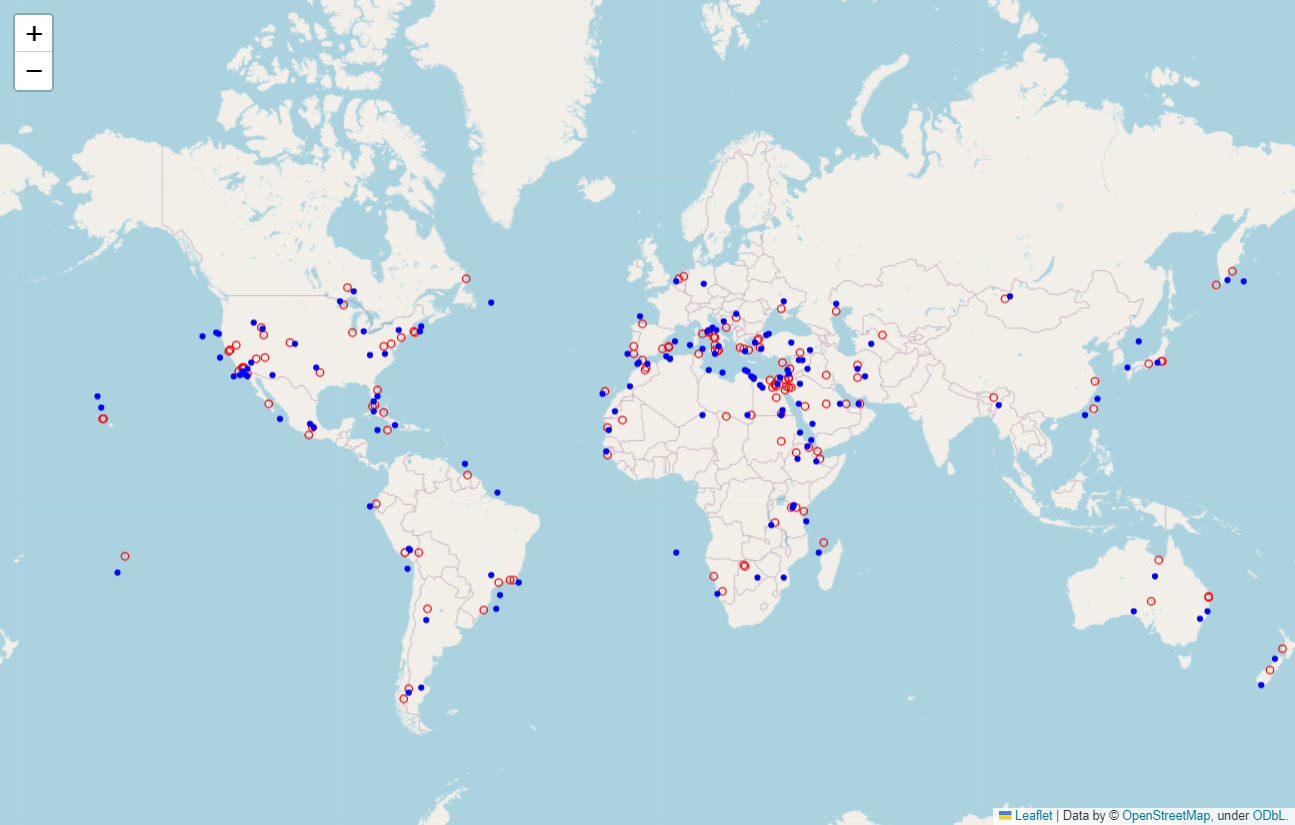

In [2]:
#display the map in png format as map is not visible in github

from selenium import webdriver
from IPython.display import Image
import time
import os


def convert_map_to_png(map, filename):

    html_filename=f'{filename}.html'
    map.save(html_filename)
    tmpurl=f'file://{os.getcwd()}/{html_filename}'
    try:
        try:
            browser = webdriver.Firefox()
        except:
            browser = webdriver.Chrome()
    except:
        browser = webdriver.Safari()
    browser.get(tmpurl)
    time.sleep(5)
    browser.save_screenshot(f'{filename}.png')
    browser.quit()
    os.remove(html_filename)
    return Image(f'{filename}.png')

convert_map_to_png(m, 'issloc-geoloc')


In [1]:
import pandas as pd

df = pd.read_csv('E:\BOSTON UNIVERSITY\CAS CS 549\ml-terc-image-geolocation\data\metadata_clean.csv')

In [6]:
unique_counts = df.agg(['nunique', 'unique']).T

# Displaying the results
unique_counts

,nunique,unique
ImageFilename,142,"[iss036e049939.jpg, iss038e064247.jpg, iss040e..."
GPSAltitude,142,"[412491.1111111111, 417359.4166666667, 420041...."
GPSSpeed,142,"[27598.74626865672, 27597.964912280702, 27578...."
ResolutionUnit,1,[2]
ExifOffset,33,"[340, 438, 620, 266, 256, 232, 242, 230, 238, ..."
Make,1,[NIKON CORPORATION]
Model,6,"[NIKON D3X, NIKON D3S, NIKON D2Xs, NIKON D4, N..."
Software,13,[Adobe Photoshop Lightroom Classic 9.2 (Macint...
XResolution,2,"[240.0, 300.0]"
YResolution,2,"[240.0, 300.0]"


In [9]:
df.drop('UserComment', axis=1, inplace=True)

fill_values = {
    'FocalPlaneResolutionUnit': 3.0,
    'SensitivityType': 2.0
}

df.fillna(value=fill_values, inplace=True)

**In this segment of the analysis, we first identified columns with a single unique non-null value alongside NaNs, particularly 'FocalPlaneResolutionUnit' and 'SensitivityType'. These NaNs were filled with the singular non-null unique value specific to each column, effectively standardizing the data within. This decision was based on the understanding that the presence of only one unique non-null value (3.0 and 2.0 respectively) signifies a standard or common setting or property for all entries, making it reasonable to assume that the NaNs should default to this common value.**

**Additionally, we removed the 'UserComment' column, as it consisted solely of NaNs and a non-informative 'ASCII', rendering it irrelevant for further analysis.**

**In the data cleaning process, we identified that the columns 'Flash' and 'SubjectDistanceRange' had only a single unique value, making them constant features across our dataset. Such columns do not offer any variability or meaningful information that could contribute to further statistical analysis or model training, as they lack discriminatory power. Consequently, we decided to remove these columns to streamline our dataset, making it more efficient for subsequent processing and analysis.**

In [11]:
df.drop(['Flash', 'SubjectDistanceRange'], axis=1, inplace=True)

In [12]:
#save the cleaned dataframe
df.to_csv('E:\BOSTON UNIVERSITY\CAS CS 549\ml-terc-image-geolocation\data\metadata_clean.csv', index=False)

**Some Vis to see the distribution of values in the columns**

Loading BokehJS ...

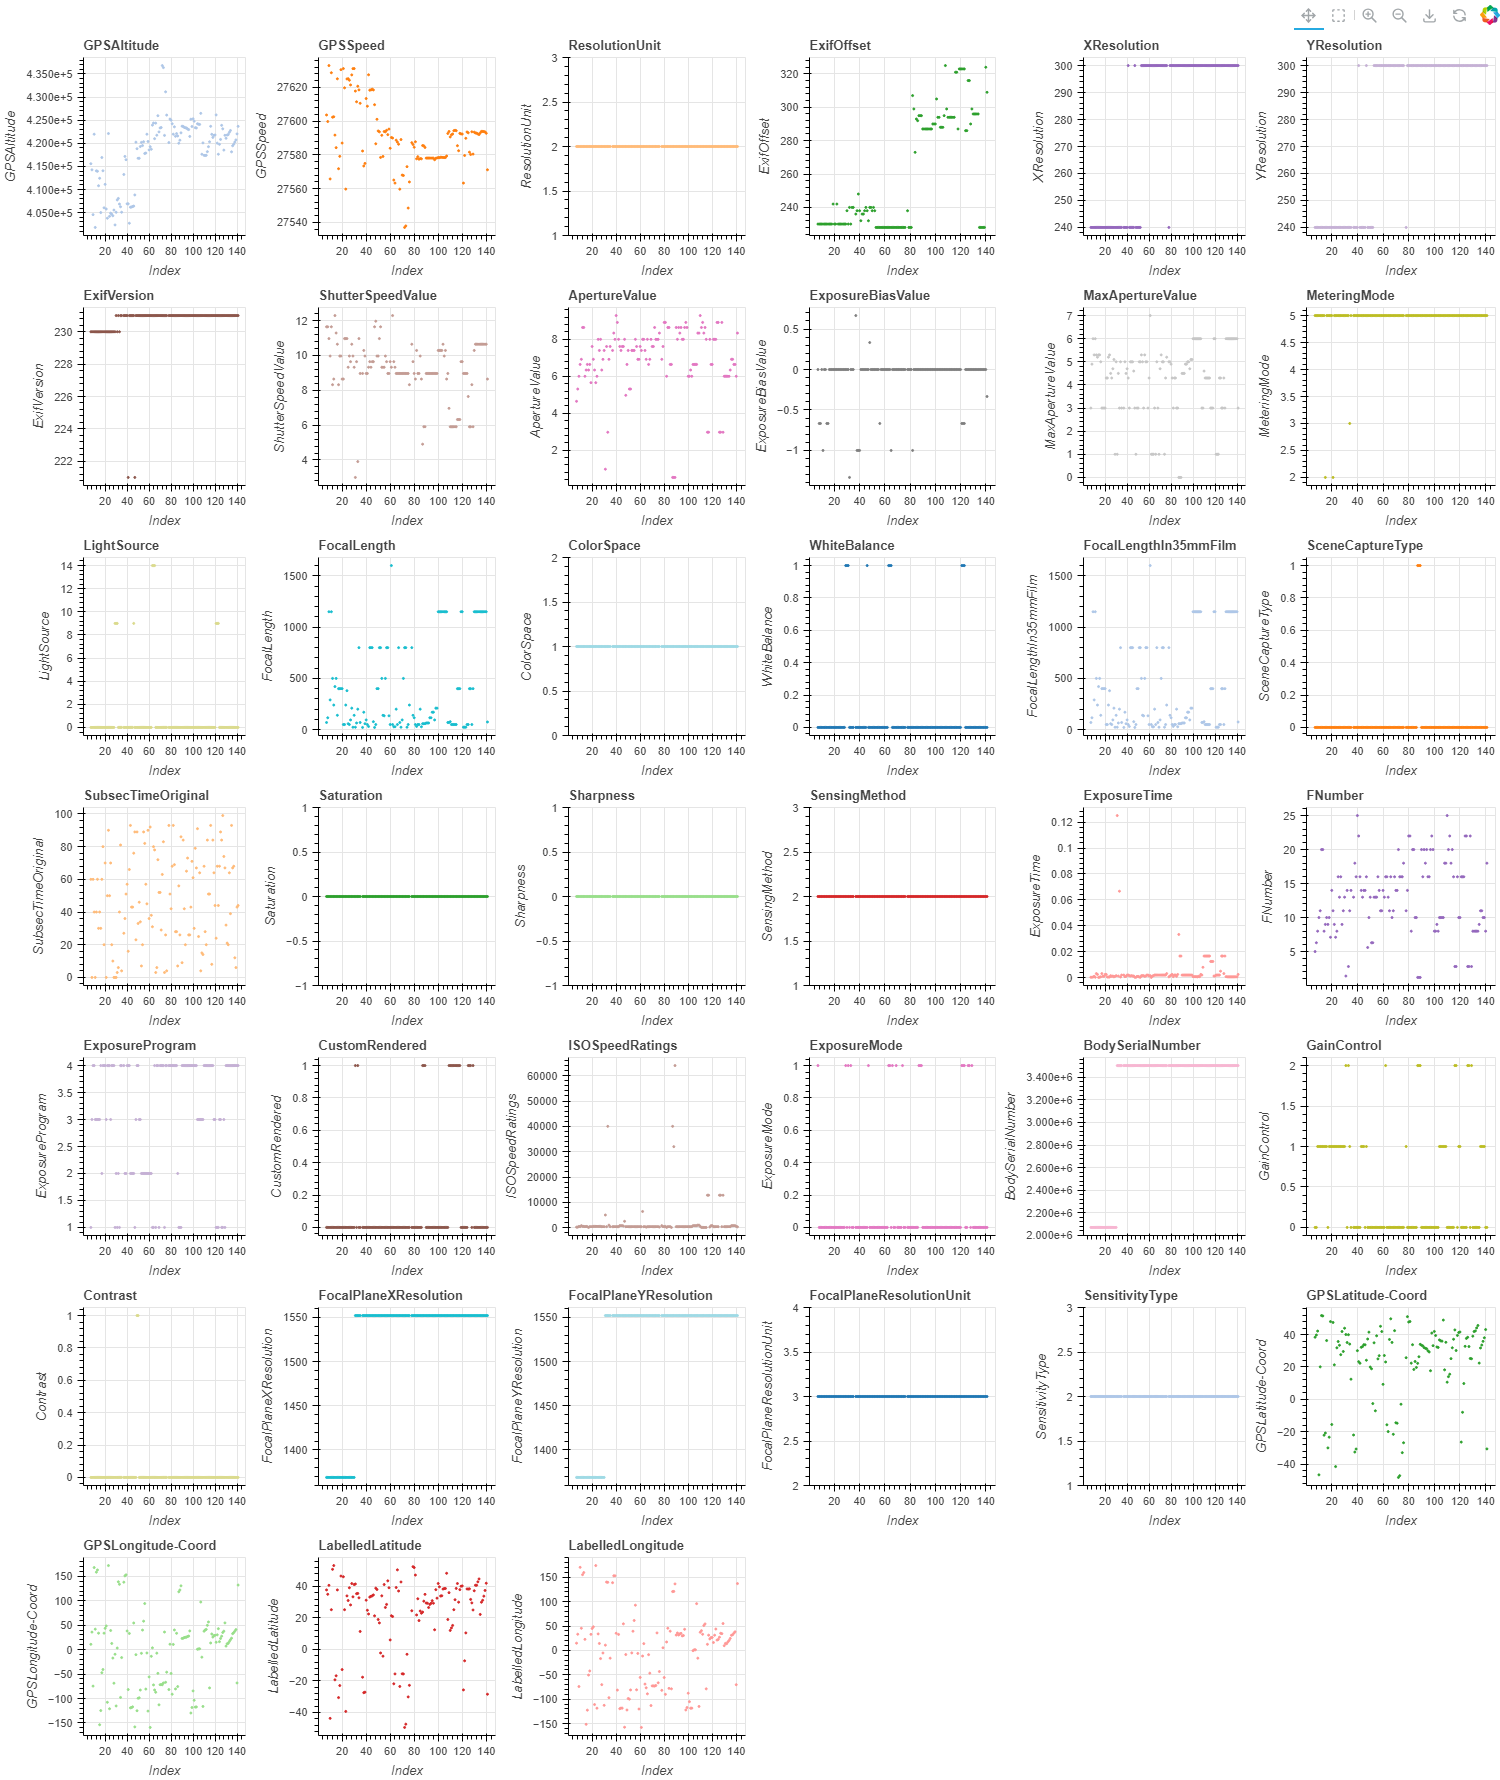

In [9]:
from bokeh.io import export_png, output_notebook
from bokeh.layouts import gridplot
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.palettes import Category20c, Category20
from bokeh.io import output_notebook
from PIL import Image
from IPython.display import display, Image 
import pandas as pd
import os

output_notebook()


df = df.dropna()  

source = ColumnDataSource(df)

plot_list = []

colors = Category20[20]

for index, column in enumerate(df.columns):
    # Skip non-numeric columns or handle them differently
    if df[column].dtype not in ['int64', 'float64']:
        continue  # or create a bar chart, etc., if it's a categorical column

    p = figure(
        title=column,
        tools="pan,box_select,zoom_in,zoom_out,save,reset",
        x_axis_label='Index',
        y_axis_label=column,
        width=250,
        height=250,
    )

    p.circle(x='index', y=column, source=source, size=2, color=colors[index % len(colors)])

    plot_list.append(p)

# Arrange plots in a grid
grid = gridplot(plot_list, ncols=6) 

png_file_path = export_png(grid, filename="plot.png")

display(Image(filename=png_file_path))

os.remove(png_file_path)

Loading BokehJS ...

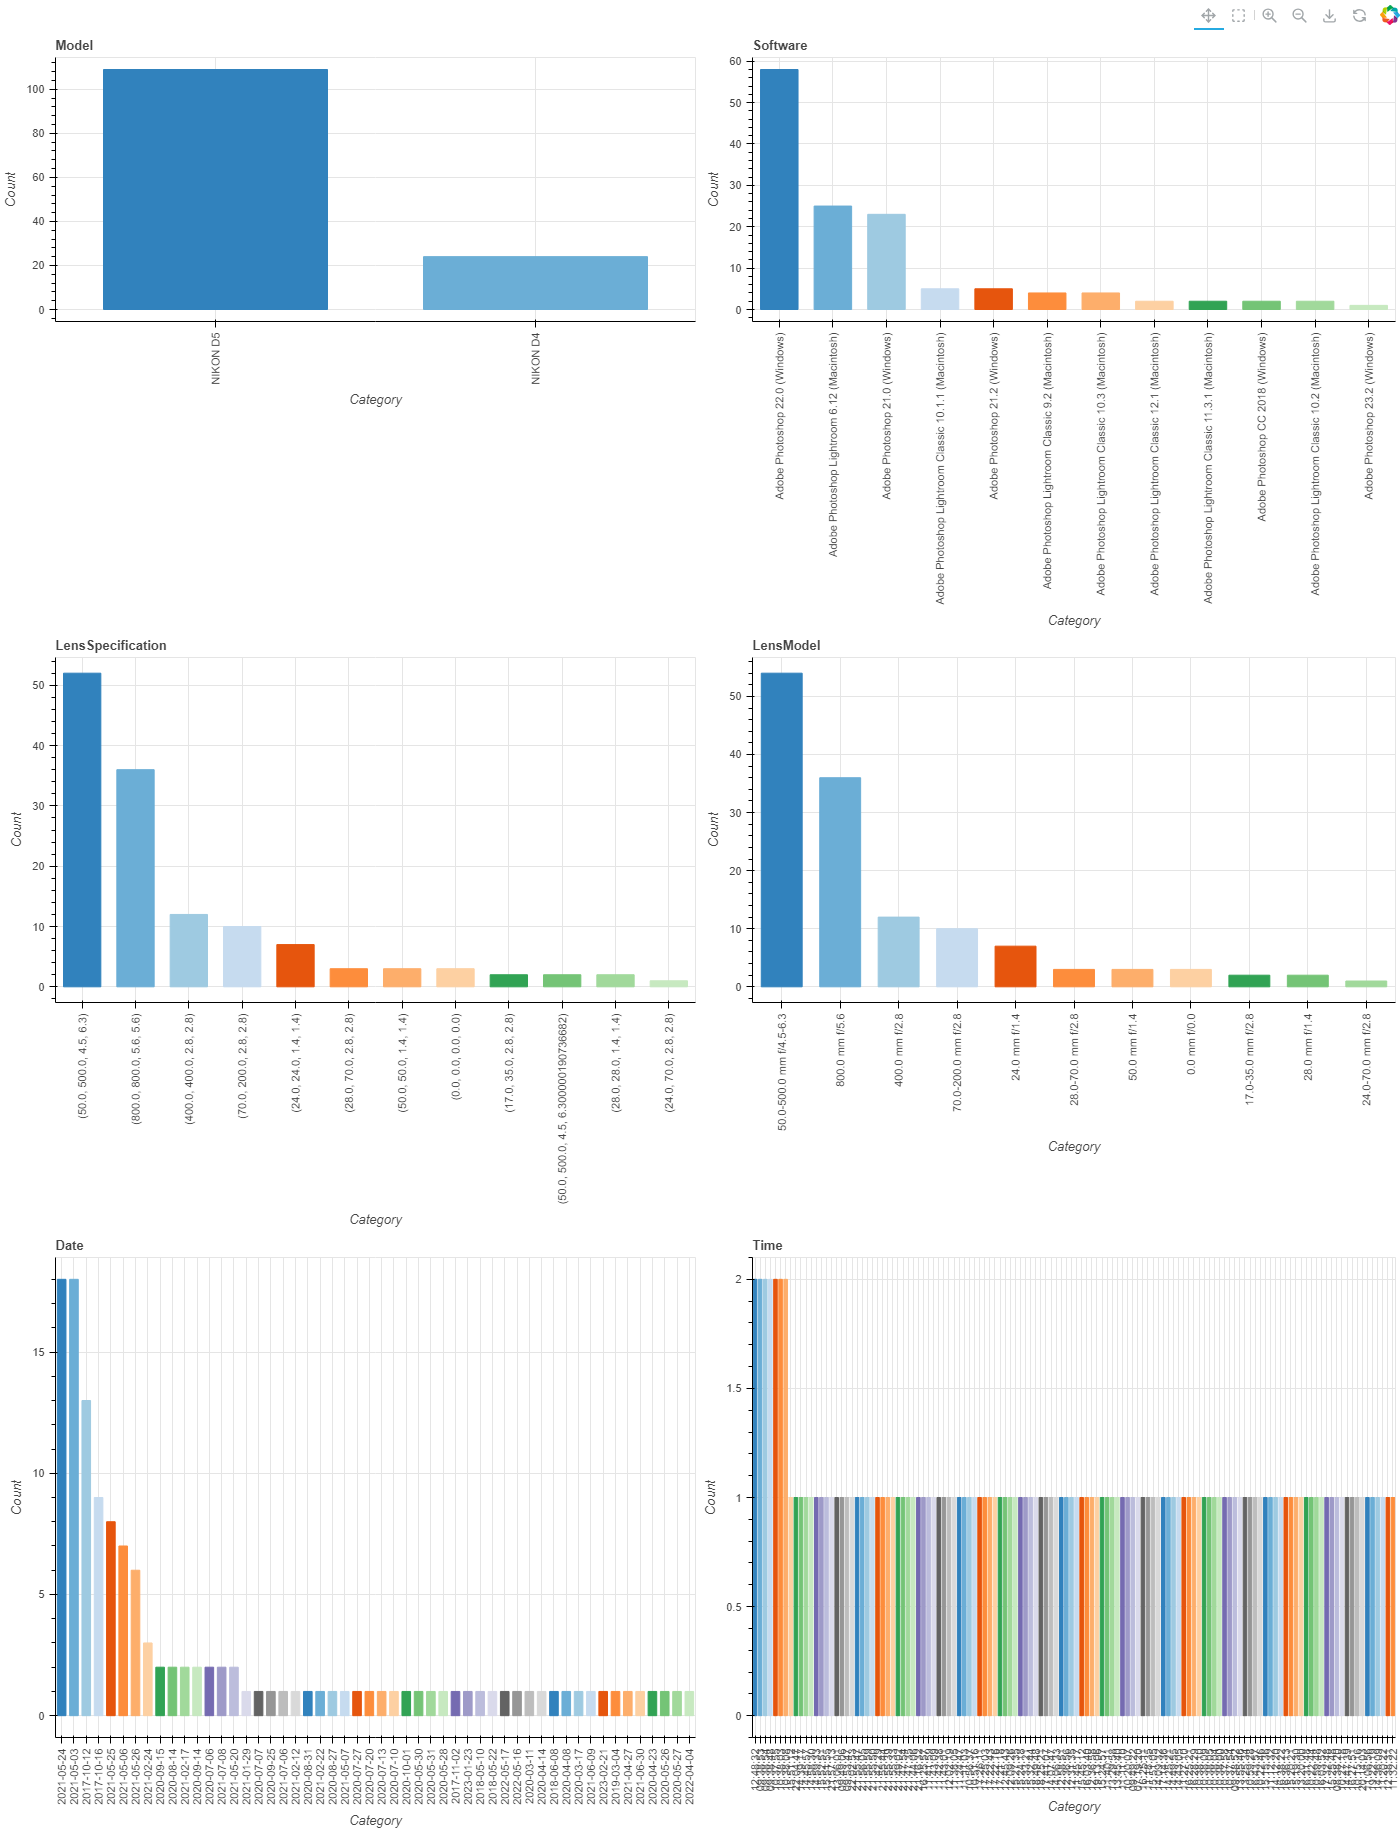

In [8]:
plot_list = []

colors = Category20c[20]  # Define a palette of colors

def get_colors_for_categories(num_categories, palette):
    """Return a list of colors based on the palette for the number of categories.
       Repeats colors if more categories than colors in the palette."""
    repeated_palette = palette * (num_categories // len(palette) + 1)
    return repeated_palette[:num_categories]

col = ['Model', 'Software', 'LensSpecification', 'LensModel', 'Date', 'Time']

for index, column in enumerate(col):
    
    category_counts = df[column].value_counts()

    # Prepare the parameters for the figure.
    figure_params = {
        "title": column,
        "tools": "pan,box_select,zoom_in,zoom_out,save,reset",
        "x_axis_label": 'Category',
        "y_axis_label": 'Count',
        "width": 700,
        "x_range": category_counts.index.tolist()  # Categories for the x-axis
    }

    
    p = figure(**figure_params)

    # Get a list of colors for the categories.
    category_colors = get_colors_for_categories(len(category_counts), colors)

    # Create a new DataFrame for the categorical data.
    category_data = pd.DataFrame({'categories': category_counts.index, 'counts': category_counts.values})
    category_data['color'] = category_colors  # Assign colors for each category

    # Use the new DataFrame as the source for the bar chart.
    source = ColumnDataSource(data=category_data)

    # Draw the bar chart.
    p.vbar(x='categories', top='counts', source=source, width=0.7, color='color')  # 'color' field in the source

    # Adjusting the x-axis labels for better readability
    p.xaxis.major_label_orientation = 1.57

    plot_list.append(p)


output_notebook()

# Arrange plots in a grid
grid = gridplot(plot_list, ncols=2)  # Adjust ncols based on your preference

png_file_path = export_png(grid, filename="plot.png")

display(Image(filename=png_file_path))

os.remove(png_file_path)